## Import Essential Library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras

## Download DataSet

In [2]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz

--2023-06-01 09:31:36--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz [following]
--2023-06-01 09:31:37--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  13.8MB/s    in 25s     

2023-06-01 09:32:04 (13.0 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]



## Extract .tgz File

In [3]:
!tar -xvzf 102flowers.tgz

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

## Download Label File

In [4]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2023-06-01 09:32:07--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat [following]
--2023-06-01 09:32:09--  https://thor.robots.ox.ac.uk/datasets/flowers-102/imagelabels.mat
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502 [application/octet-stream]
Saving to: ‘imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2023-06-01 09:32:10 (93.2 MB/s) - ‘imagelabels.mat’ saved [502/502]



## Read .mat File 

In [5]:
from scipy.io import loadmat
mat = loadmat('/content/imagelabels.mat')
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009', '__version__': '1.0', '__globals__': [], 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}


Get labels from .mat file and create a np array

In [6]:
labels = np.array([[element for element in upperElement] for upperElement in mat['labels']])

In [7]:
labels.shape

(1, 8189)

In [8]:
labels = labels.reshape(-1) - 1
labels

array([76, 76, 76, ..., 61, 61, 61], dtype=uint8)

In [9]:
np.unique(labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101], dtype=uint8)

In [10]:
labels.shape

(8189,)

## Class Name List

In [11]:
class_name = [
 'pink primrose',
 'hard-leaved pocket orchid',
 'canterbury bells',
 'sweet pea',
 'english marigold',
 'tiger lily',
 'moon orchid',
 'bird of paradise',
 'monkshood',
 'globe thistle',
 'snapdragon',
 "colt's foot",
 'king protea',
 'spear thistle',
 'yellow iris',
 'globe-flower',
 'purple coneflower',
 'peruvian lily',
 'balloon flower',
 'giant white arum lily',
 'fire lily',
 'pincushion flower',
 'fritillary',
 'red ginger',
 'grape hyacinth',
 'corn poppy',
 'prince of wales feathers',
 'stemless gentian',
 'artichoke',
 'sweet william',
 'carnation',
 'garden phlox',
 'love in the mist',
 'mexican aster',
 'alpine sea holly',
 'ruby-lipped cattleya',
 'cape flower',
 'great masterwort',
 'siam tulip',
 'lenten rose',
 'barbeton daisy',
 'daffodil',
 'sword lily',
 'poinsettia',
 'bolero deep blue',
 'wallflower',
 'marigold',
 'buttercup',
 'oxeye daisy',
 'common dandelion',
 'petunia',
 'wild pansy',
 'primula',
 'sunflower',
 'pelargonium',
 'bishop of llandaff',
 'gaura',
 'geranium',
 'orange dahlia',
 'pink-yellow dahlia?',
 'cautleya spicata',
 'japanese anemone',
 'black-eyed susan',
 'silverbush',
 'californian poppy',
 'osteospermum',
 'spring crocus',
 'bearded iris',
 'windflower',
 'tree poppy',
 'gazania',
 'azalea',
 'water lily',
 'rose',
 'thorn apple',
 'morning glory',
 'passion flower',
 'lotus',
 'toad lily',
 'anthurium',
 'frangipani',
 'clematis',
 'hibiscus',
 'columbine',
 'desert-rose',
 'tree mallow',
 'magnolia',
 'cyclamen ',
 'watercress',
 'canna lily',
 'hippeastrum ',
 'bee balm',
 'ball moss',
 'foxglove',
 'bougainvillea',
 'camellia',
 'mallow',
 'mexican petunia',
 'bromelia',
 'blanket flower',
 'trumpet creeper',
 'blackberry lily',
]

In [12]:
# img = cv2.imread('/content/jpg/image_02023.jpg')[:,:,::-1]
# img = cv2.resize(img, None, fx=0.5, fy=0.5)
# img.shape

## Show Example of DataSet With Its Label

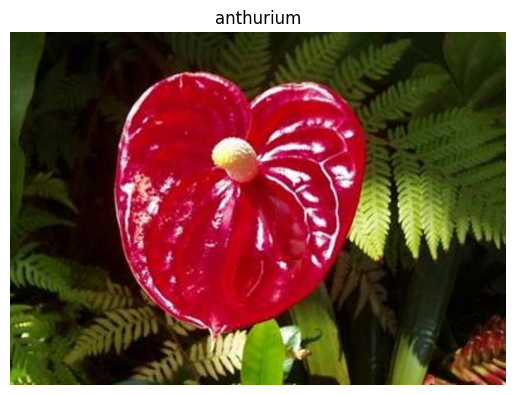

In [12]:
img = cv2.imread('/content/jpg/image_02023.jpg')[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(class_name[labels[2022]])
plt.show()

## Resize Image

With Pil library we read images from directory, resize them and save them.

In [13]:
from PIL import Image
DATA_DIR = '/content/jpg'
for file in os.listdir(DATA_DIR):
    f_img = DATA_DIR+"/"+file
    img = Image.open(f_img)
    img = img.resize((224,224))
    img.save(f_img)

## Plot Image After Resizing

image shape:  (224, 224, 3)


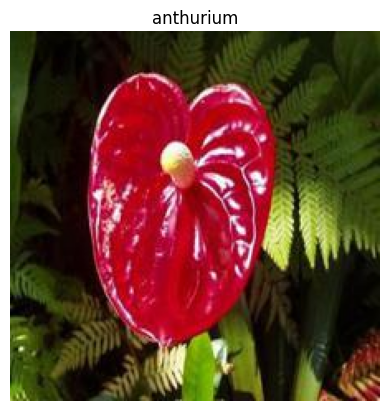

In [18]:
img = cv2.imread('/content/jpg/image_02023.jpg')[:,:,::-1]
print("image shape: ", img.shape)
plt.imshow(img)
plt.axis('off')
plt.title(class_name[labels[2022]])
plt.show()

## Count Number of File In Directory

In [19]:
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(DATA_DIR):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)

Searching in :  /content/jpg
Total number of files 8189
Total Number of directories 0


## Create Dataset

- Train Dataset : 0.7
- Test Dataset : 0.2
- Validation Dataset : 0.1

In [20]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
TEST_RATIO = 0.3
train_ds = keras.utils.image_dataset_from_directory(
  DATA_DIR,
  seed=123,
  labels=labels.tolist(),
  label_mode='int',
  validation_split=TEST_RATIO,
  subset="training",
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE,
  
  )

val_ds = keras.utils.image_dataset_from_directory(
  DATA_DIR,
  seed=123,
  labels=labels.tolist(),
  label_mode='int',
  validation_split=TEST_RATIO,
  subset="validation",
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
  )

Found 8189 files belonging to 102 classes.
Using 5733 files for training.
Found 8189 files belonging to 102 classes.
Using 2456 files for validation.


In [21]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((2*val_batches) // 3)
val_ds = val_ds.skip((2*val_batches) // 3)

## Plot Images

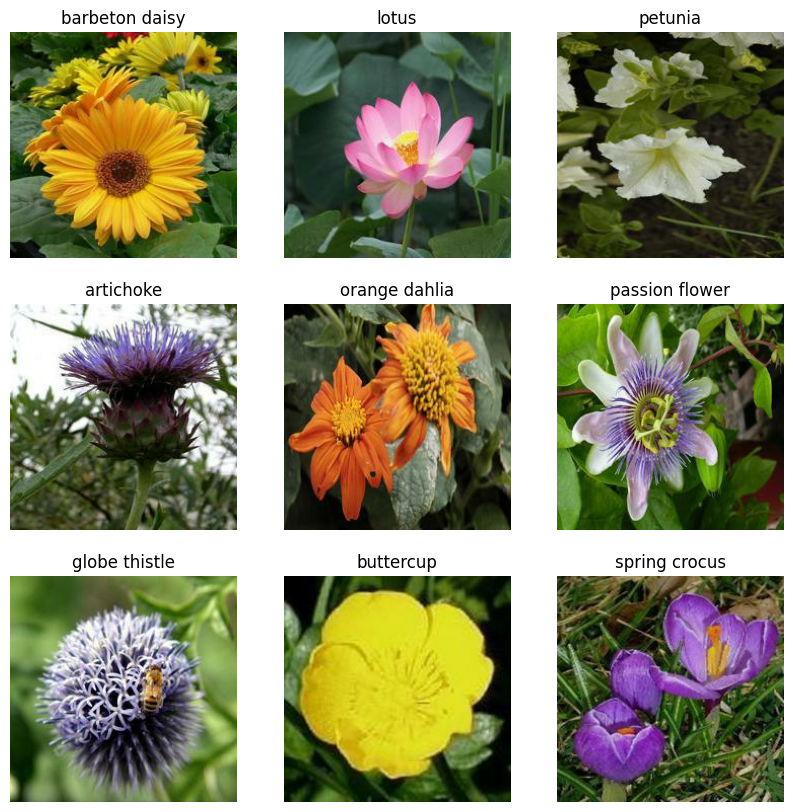

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  lbl=labels.numpy()
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[lbl[i]])
    plt.axis("off")

## ANN

In [23]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Rescaling
ann_model = keras.Sequential(
    [
        Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        Flatten(),
        Dense(256, activation="relu", name="layer1"),
        Dense(256, activation="relu", name="layer2"),
        Dropout(0.2),
     
        Dense(512, activation="relu", name="layer3"),
        Dense(512, activation="relu", name="layer4"),
        Dropout(0.2),
        
        Dense(256, activation="relu", name="layer5"),
        Dropout(0.2),
        Dense(102, activation="softmax", name="output")
    ],
    name="sequential_model"
)
ann_model.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 layer1 (Dense)              (None, 256)               38535424  
                                                                 
 layer2 (Dense)              (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 layer3 (Dense)              (None, 512)               131584    
                                                                 
 layer4 (Dense)              (None, 512)          

### Plot ANN

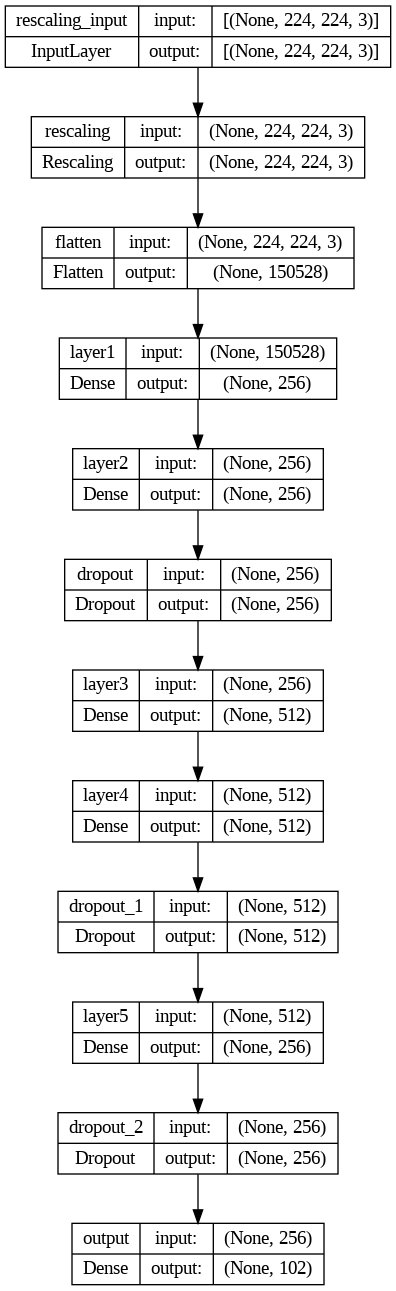

In [24]:
keras.utils.plot_model(ann_model, show_shapes=True, show_layer_names=True)

### Complie ANN

In [25]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit ANN

In [26]:
history = ann_model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
180/180 [==============================] - 17s 45ms/step - loss: 5.0661 - accuracy: 0.0342 - val_loss: 4.1799 - val_accuracy: 0.0498
Epoch 2/30
180/180 [==============================] - 9s 52ms/step - loss: 4.1704 - accuracy: 0.0611 - val_loss: 4.0907 - val_accuracy: 0.0364
Epoch 3/30
180/180 [==============================] - 11s 60ms/step - loss: 4.0086 - accuracy: 0.0703 - val_loss: 4.0804 - val_accuracy: 0.0522
Epoch 4/30
180/180 [==============================] - 9s 49ms/step - loss: 3.8532 - accuracy: 0.0797 - val_loss: 3.6705 - val_accuracy: 0.0947
Epoch 5/30
180/180 [==============================] - 8s 42ms/step - loss: 3.7127 - accuracy: 0.0895 - val_loss: 3.6598 - val_accuracy: 0.0934
Epoch 6/30
180/180 [==============================] - 7s 40ms/step - loss: 3.5975 - accuracy: 0.1048 - val_loss: 3.4747 - val_accuracy: 0.1226
Epoch 7/30
180/180 [==============================] - 6s 35ms/step - loss: 3.5014 - accuracy: 0.1095 - val_loss: 3.4626 - val_accuracy: 0.09

### Plot Train Accuracy, Val Accuracy, Train Loss, Val Loss

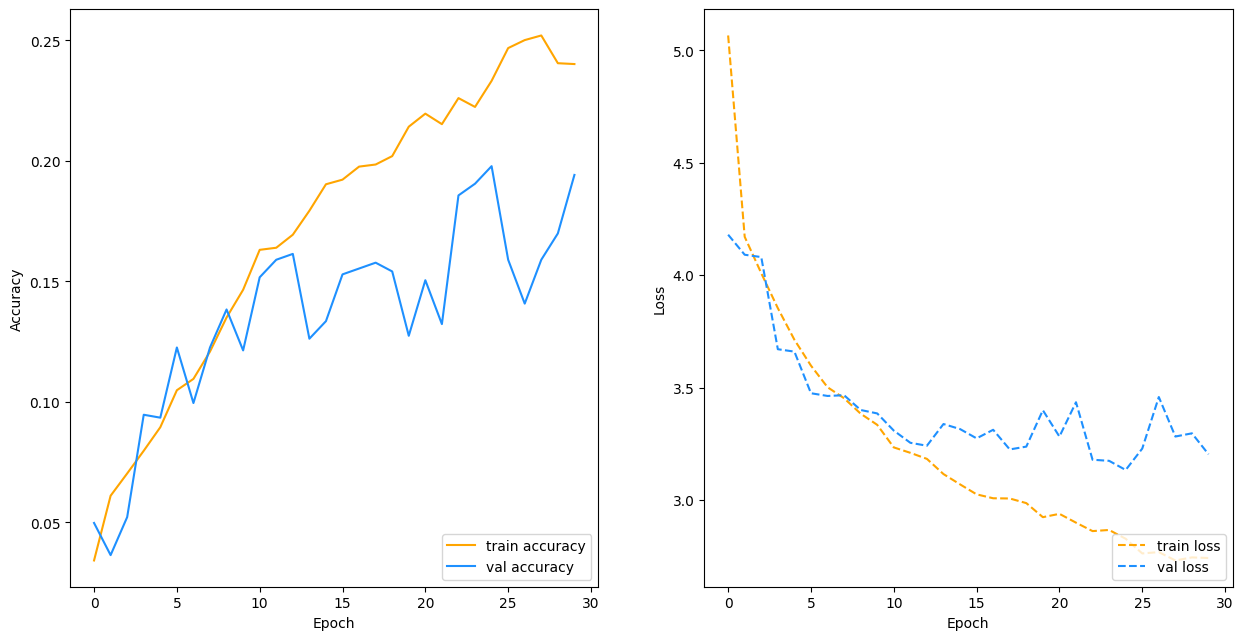

In [27]:
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='val accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='val loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

## Transfer Learning

In this part we want to train our data with one of powerful models and get its weights and train out with it

### Define MobileNetV2

In [28]:
from keras.applications import MobileNetV2
# BackBone
pretrained_model = MobileNetV2(
    input_shape = (IMG_HEIGHT, IMG_WIDTH, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'max'
)
pretrained_model.summary()

9406464/9406464 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

### Freezing Pretrained Model

In [29]:
pretrained_model.trainable = False

### Get Last Layer of Pretrained Model

In [30]:
last_layer = pretrained_model.get_layer(index=-1)

In [31]:
last_layer_output = last_layer.output

### Develope Pretrained Model

In [32]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Dropout
from keras import regularizers

x = Flatten(name="flatten")(last_layer_output)
x = Dense(2048, activation="relu", name="layer1")(x)
x = Dense(2048, activation="relu", name="layer2")(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu", name="layer3")(x)
x = Dropout(0.2)(x)
output = Dense(102, activation="softmax", name="output")(x)

cnn_model = Model(inputs=pretrained_model.input, outputs=output)

### Compile Model

In [33]:
from keras.losses import SparseCategoricalCrossentropy
cnn_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Fit CNN

In [34]:
history = cnn_model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


180/180 [==============================] - 19s 65ms/step - loss: 4.5682 - accuracy: 0.0565 - val_loss: 4.0495 - val_accuracy: 0.1032
Epoch 2/50
180/180 [==============================] - 11s 58ms/step - loss: 3.8090 - accuracy: 0.1364 - val_loss: 3.6822 - val_accuracy: 0.1274
Epoch 3/50
180/180 [==============================] - 10s 55ms/step - loss: 3.3544 - accuracy: 0.2070 - val_loss: 3.2909 - val_accuracy: 0.1966
Epoch 4/50
180/180 [==============================] - 10s 56ms/step - loss: 3.0075 - accuracy: 0.2501 - val_loss: 3.3857 - val_accuracy: 0.2051
Epoch 5/50
180/180 [==============================] - 10s 57ms/step - loss: 2.7547 - accuracy: 0.2958 - val_loss: 2.9493 - val_accuracy: 0.3046
Epoch 6/50
180/180 [==============================] - 10s 57ms/step - loss: 2.4816 - accuracy: 0.3548 - val_loss: 3.0410 - val_accuracy: 0.2464
Epoch 7/50
180/180 [==============================] - 11s 59ms/step - loss: 2.3388 - accuracy: 0.3783 - val_loss: 2.8899 - val_accuracy: 0.3022
Epo

### Plot Train Accuracy, Val Accuracy, Train Loss, Val Loss

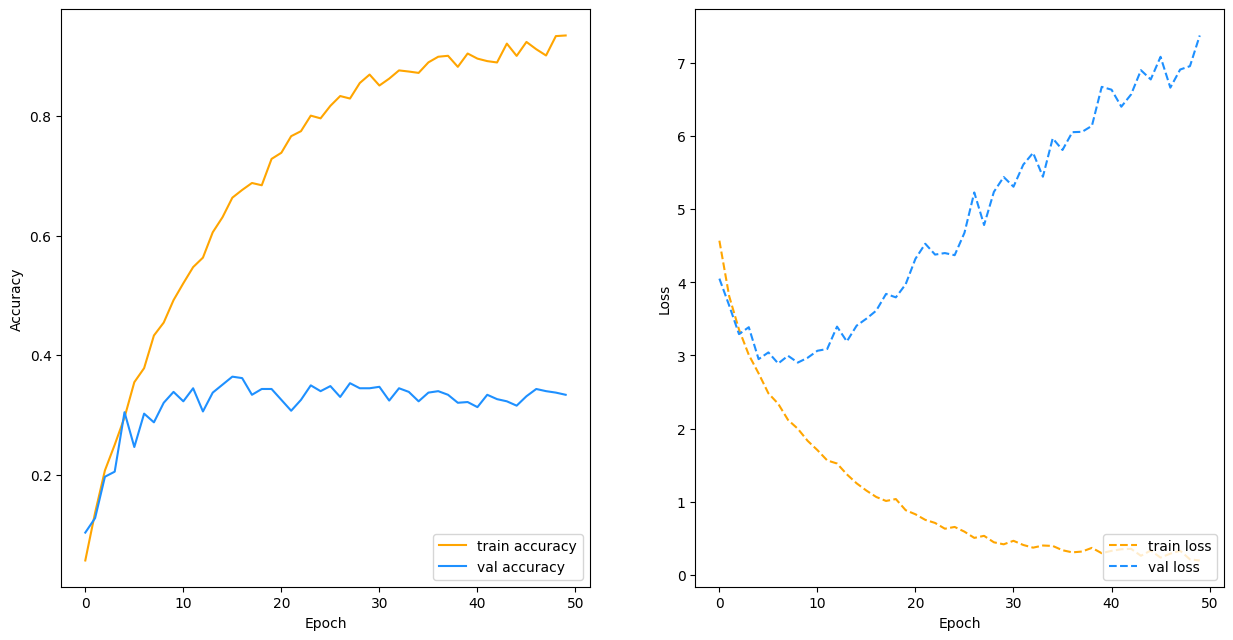

In [35]:
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='val accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='val loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

### Prediction

1/1 [==============================] - 1s 776ms/step


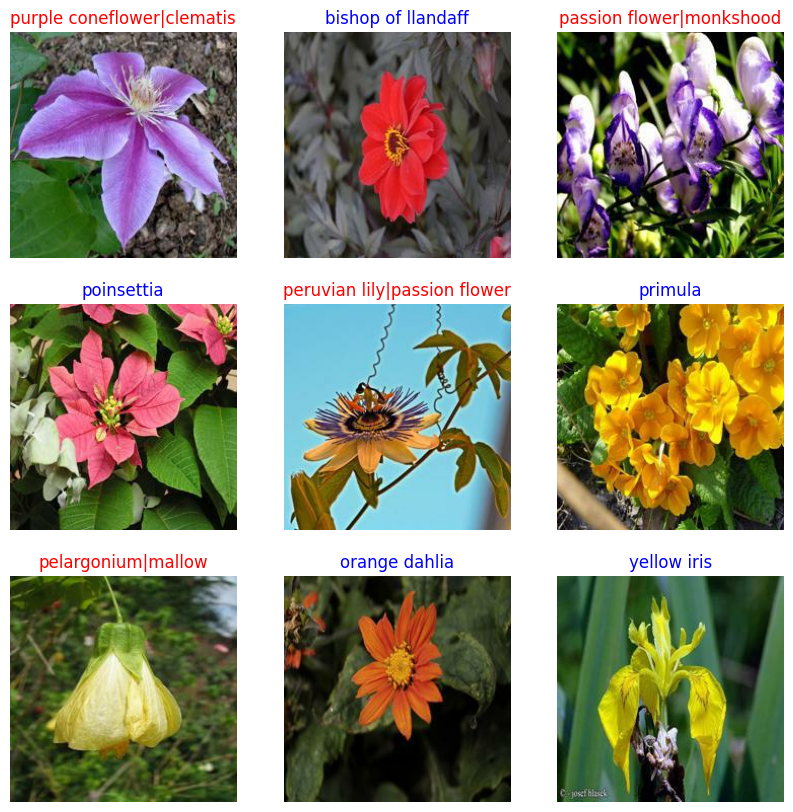

In [36]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  prediction_values = cnn_model.predict(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    if np.argmax(prediction_values[i]) == labels[i]:
      plt.title(class_name[labels[i]], color='blue')
    else:
      plt.title(class_name[np.argmax(prediction_values[i])]+'|'+class_name[labels[i]], color='red')
    plt.axis("off")